In [1]:
import pickle 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import glob

In [2]:
def load_results(scratch_path, dataset, mode, fairness_method, date=None):
    if mode == 'BOOST': 
        fmt_path = glob.glob(f'{scratch_path}{dataset}/{mode}/boost2/FMT_AVG_*_{fairness_method}*.xlsx')[0] 
        std_path = glob.glob(f'{scratch_path}{dataset}/{mode}/boost2/AVG_*_{fairness_method}*.xlsx') [0]
    else:    
        if date != None: 
            std_path = f'{scratch_path}{dataset}/{mode}/AVG_all_res_{fairness_method}_{date}.xlsx'
            fmt_path = f'{scratch_path}{dataset}/{mode}/FMT_AVG_all_res_{fairness_method}_{date}.xlsx'

        else: 
            fmt_path = glob.glob(f'{scratch_path}{dataset}/{mode}/FMT_AVG_*_{fairness_method}*.xlsx')[0] 
            std_path = glob.glob(f'{scratch_path}{dataset}/{mode}/AVG_*_{fairness_method}*.xlsx') [0]

    std_data = pd.read_excel(std_path)
    fmt_data = pd.read_excel(fmt_path)
    
    
    return fmt_data, std_data
def gamma_prep(df, mode): 
    if mode == 'PS': 
        df_slice = pd.concat([df[df.param == 'PinSage'][report]] *9).reset_index(drop=True)
    if mode == 'LGCN': 
        df_slice = pd.concat([df[df.param == 'vanilla'][report]] *9).reset_index(drop=True)
    if mode == 'SR': 
        df_slice = df[report]
    if mode == 'REDRESS': 
        df_slice = df.loc[df.param != 'PinSage'][report]
    if mode == 'XQUAD': 
        df_slice = df[report]
    if mode == 'BOOST':
        df_slice = df.loc[df.param != 'PinSage'][report]
    df_slice['param_val'] = np.arange(0.1, 1.0, 0.1)
    df_slice = df_slice.rename(columns={
        'r_precision': 'recall@100', 
        'competition_ndcg': 'ndcg@100', 
        'artist_prec': 'artist_recall@100', 
        'sound_homogeneity': 'flow', 
        'perc_LT': '%LT_songs', 
        'LT_item_cvg': 'LT_song_coverage', 
        'arid_cvg': 'artist_coverage'
    })
    return df_slice 

In [3]:
report = ['r_precision', 'competition_ndcg','artist_prec', 'sound_homogeneity', 
        "norm_diversity",  'perc_LT', 'LT_item_cvg', 'arid_cvg' ]
scratch_path = '/home/mila/r/rebecca.salganik/scratch/PinSAGE_experiments/FULL_RUNS/'
dataset = 'LFM_Subset'
fairness_method = 'log10'

In [4]:
ps, _ = load_results(scratch_path, dataset, 'REDRESS', fairness_method)
ps_slice = gamma_prep(ps, 'PS')

lgcn, _ = load_results(scratch_path, dataset, 'LGCN', fairness_method)
lgcn_slice = gamma_prep(lgcn, 'LGCN')

sr, _ = load_results(scratch_path, dataset, 'SR', fairness_method)
sr_slice = gamma_prep(sr, 'SR')

r, _ = load_results(scratch_path, dataset, 'REDRESS', fairness_method)
r_slice = gamma_prep(r, 'REDRESS')

x, _ = load_results(scratch_path, dataset, 'XQUAD', fairness_method)
x_slice = gamma_prep(x, 'XQUAD')

b, _ = load_results(scratch_path, dataset, 'BOOST', fairness_method)
b_slice = gamma_prep(b, 'BOOST')

/tmp/ipykernel_10859/1929890629.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice['param_val'] = np.arange(0.1, 1.0, 0.1)
/tmp/ipykernel_10859/1929890629.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice['param_val'] = np.arange(0.1, 1.0, 0.1)


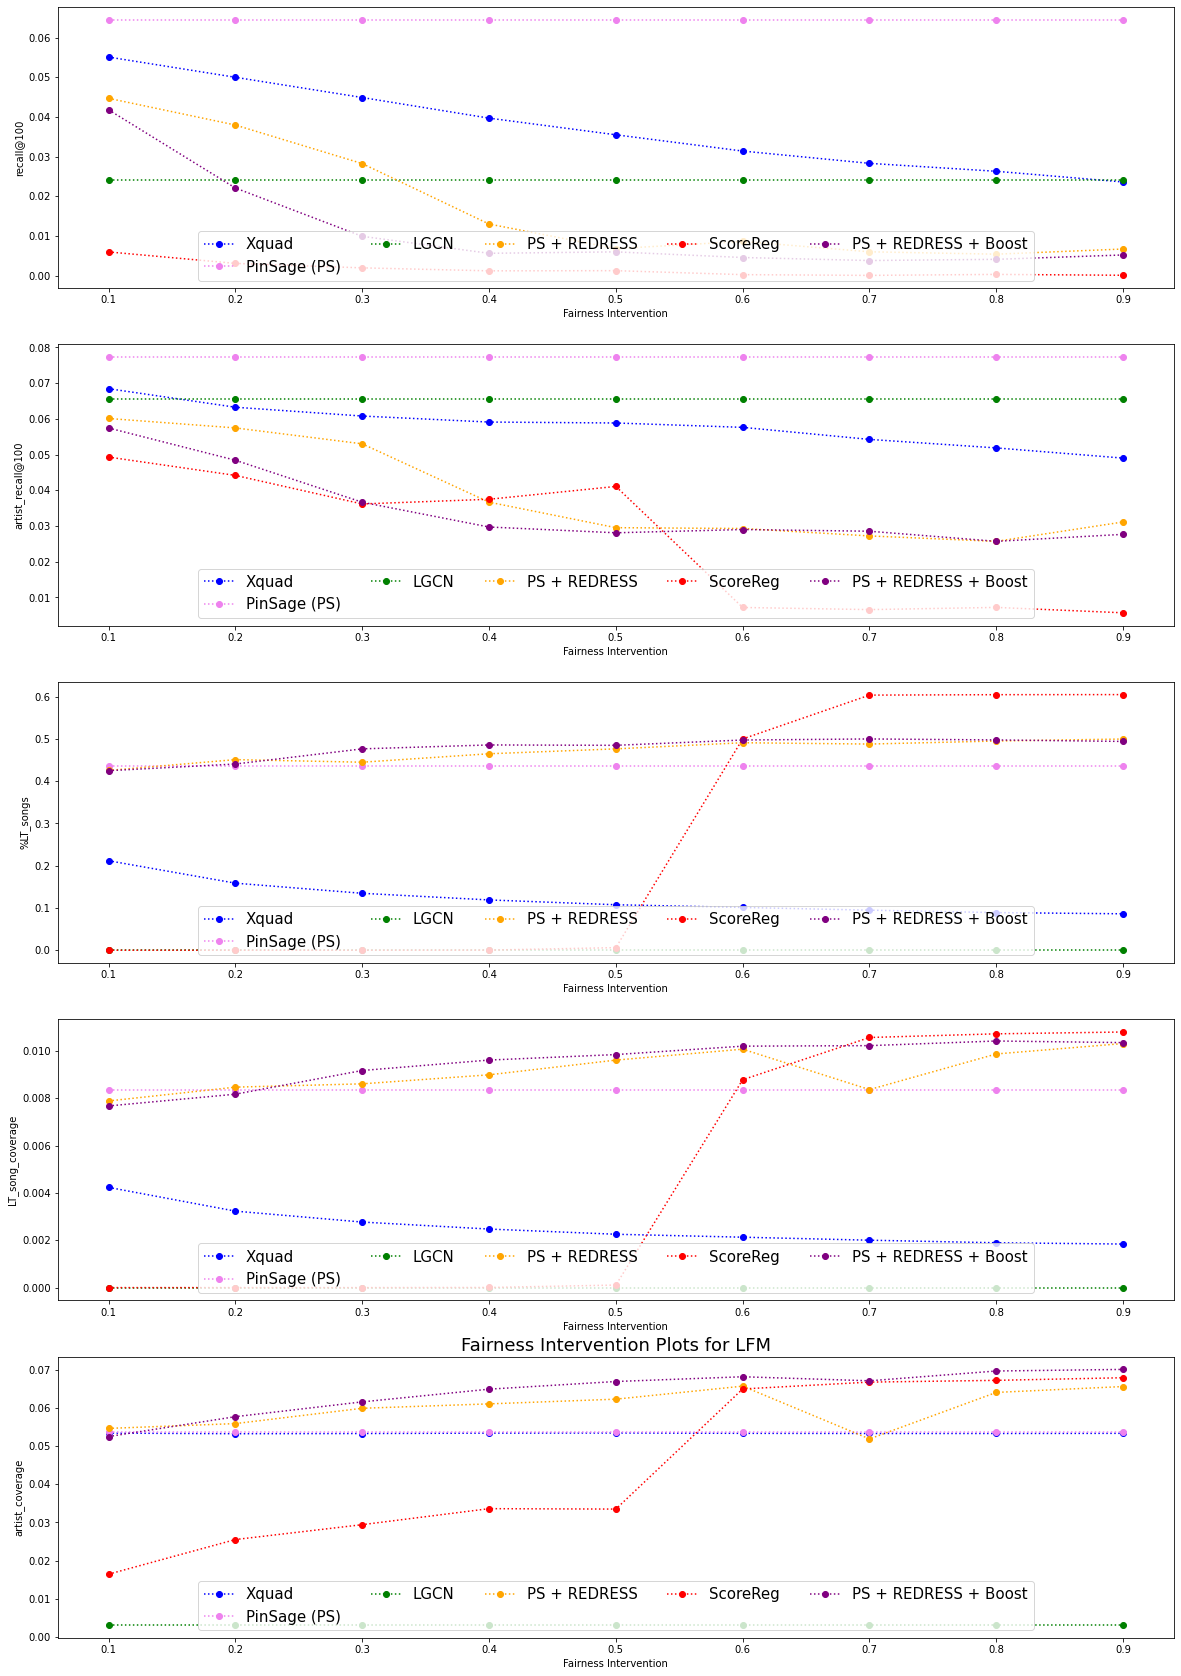

In [5]:
df_dict = {'Xquad': x_slice, 
           'PinSage (PS)': ps_slice, 
           'LGCN': lgcn_slice,
           'PS + REDRESS': r_slice, 
           'ScoreReg': sr_slice, 
           'PS + REDRESS + Boost': b_slice}
colors = {'Xquad': 'blue', 
           'PinSage (PS)': 'violet', 
           'LGCN': 'green',
           'PS + REDRESS': 'orange', 
           'ScoreReg': 'red', 
           'PS + REDRESS + Boost': 'purple'}
metrics = [['recall@100'], ['artist_recall@100'], ['%LT_songs'], ['LT_song_coverage'], ['artist_coverage']]
kw = dict(ncol=5, loc="lower center", frameon=True) 
fig, ax = plt.subplots(5, 1, figsize=(20, 30)) 
plt.rcParams.update({'font.size': 15})

plt.title("Fairness Intervention Plots for LFM")
for name, df in df_dict.items():
    for m_idx in range(len(metrics)): 
        ax[m_idx].plot(df['param_val'], df[metrics[m_idx]], marker='o', linestyle='dotted',color = colors[name], label=name)
        ax[m_idx].set_xlabel('Fairness Intervention')
        ax[m_idx].set_ylabel(metrics[m_idx][0])
        ax[m_idx].legend(**kw)
        

    